<a href="https://colab.research.google.com/github/naren-17/BOOTCAMP/blob/main/Day10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [23]:
players = [f"Player {i}" for i in range(1, 101)]
teams = [f"Team {chr(65+i)}" for i in range(10)]
positions = ["Forward", "Midfielder", "Defender", "Goalkeeper"]

data = []
for _ in range(500):
    player = random.choice(players)
    team = random.choice(teams)
    position = random.choice(positions)
    minutes_played = random.randint(20, 90)

    if position == "Forward":
        goals = random.randint(0, 3)
        assists = random.randint(0, 2)
        shots_on_target = random.randint(1, 5)
        tackles_won = random.randint(0, 2)
        saves = 0
    elif position == "Midfielder":
        goals = random.randint(0, 2)
        assists = random.randint(0, 3)
        shots_on_target = random.randint(0, 4)
        tackles_won = random.randint(1, 4)
        saves = 0
    elif position == "Defender":
        goals = random.randint(0, 1)
        assists = random.randint(0, 1)
        shots_on_target = random.randint(0, 2)
        tackles_won = random.randint(2, 6)
        saves = 0
    else:
        goals = 0
        assists = random.randint(0, 1)
        shots_on_target = 0
        tackles_won = random.randint(0, 2)
        saves = random.randint(2, 8)

    pass_accuracy = random.randint(60, 95)
    fouls_committed = random.randint(0, 3)
    yellow_cards = random.randint(0, 2)
    red_cards = 1 if yellow_cards == 2 else 0

    performance_score = (goals * 3) + (assists * 2) + (shots_on_target * 1) + (tackles_won * 1) + (saves * 2)
    performance_label = "Above Average" if performance_score >= 5 else "Below Average"

    data.append([player, team, position, minutes_played, goals, assists, shots_on_target, tackles_won, saves,
                 pass_accuracy, fouls_committed, yellow_cards, red_cards, performance_label])
df = pd.DataFrame(data, columns=["Player", "Team", "Position", "Minutes Played", "Goals", "Assists", "Shots on Target",
                                 "Tackles Won", "Saves", "Pass Accuracy", "Fouls Committed", "Yellow Cards", "Red Cards",
                                 "Performance Label"])

In [7]:
columns = ["Player", "Team", "Position", "Minutes Played", "Goals", "Assists", "Shots on Target", "Tackles Won",
           "Saves", "Pass Accuracy", "Fouls Committed", "Yellow Cards", "Red Cards", "Performance Label"]

In [8]:
df = pd.DataFrame(data, columns=columns)

In [9]:
df.to_csv("football_player_performance.csv", index=False)
print("Football Player Performance Dataset Created Successfully!")

Football Player Performance Dataset Created Successfully!


In [29]:
encoder = LabelEncoder()
df["Player"] = encoder.fit_transform(df["Player"])
df["Team"] = encoder.fit_transform(df["Team"])
df["Position"] = encoder.fit_transform(df["Position"])
df["Performance Label"] = encoder.fit_transform(df["Performance Label"])

features = ["Player", "Team", "Position", "Minutes Played", "Goals", "Assists", "Shots on Target", "Tackles Won",
            "Saves", "Pass Accuracy", "Fouls Committed", "Yellow Cards", "Red Cards"]
target = "Performance Label"

X = df[features]
y = df[target]

print("X shape after selection:", X.shape)
print("y shape after selection:", y.shape)

X shape after selection: (500, 13)
y shape after selection: (500,)


In [13]:
print(df.shape)

(1, 14)


In [16]:
print(f"X shape: {X.shape}, y shape: {y.shape}")


X shape: (1, 13), y shape: (1,)


In [17]:
print(df.head())

   Player  Team  Position  Minutes Played  Goals  Assists  Shots on Target  \
0       0     0         0              31      0        0                2   

   Tackles Won  Saves  Pass Accuracy  Fouls Committed  Yellow Cards  \
0            5      0             68                2             0   

   Red Cards  Performance Label  
0          0                  0  


In [25]:
print(df.shape)

(500, 14)


In [30]:
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Unique values in y:", y.nunique())
print(y.value_counts())


X shape: (500, 13)
y shape: (500,)
Unique values in y: 2
Performance Label
0    464
1     36
Name: count, dtype: int64


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Train set: (400, 13), Test set: (100, 13)


In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Model Accuracy: 0.96

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        95
           1       1.00      0.20      0.33         5

    accuracy                           0.96       100
   macro avg       0.98      0.60      0.66       100
weighted avg       0.96      0.96      0.95       100



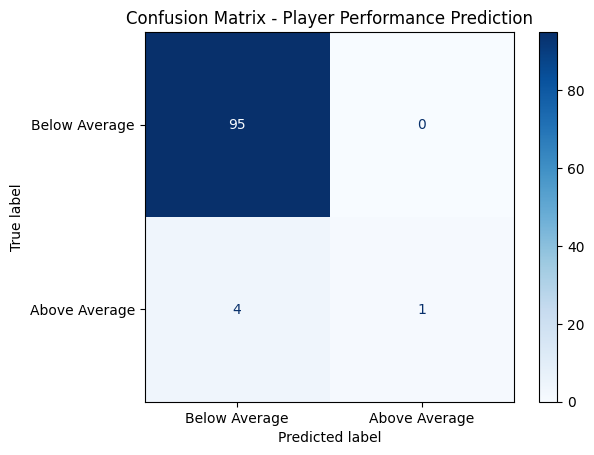

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Below Average", "Above Average"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Player Performance Prediction")
plt.show()

<ipython-input-35-372e291b9b39>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")


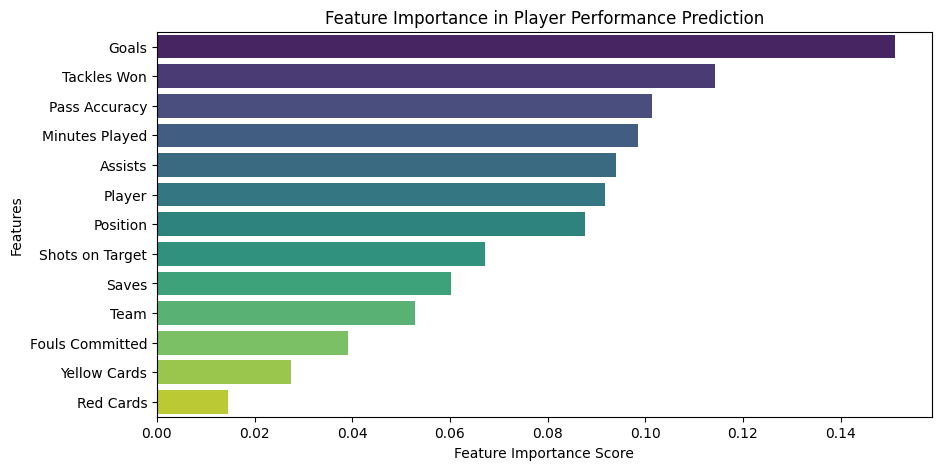

In [35]:
feature_importance = model.feature_importances_
feature_names = features
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Player Performance Prediction")
plt.show()


<ipython-input-36-96bf619a53c1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Performance Label"], palette="coolwarm")


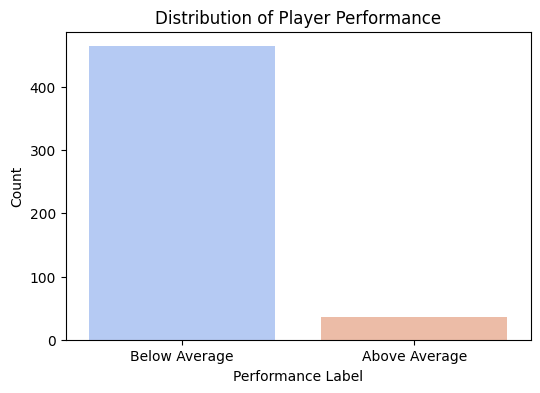

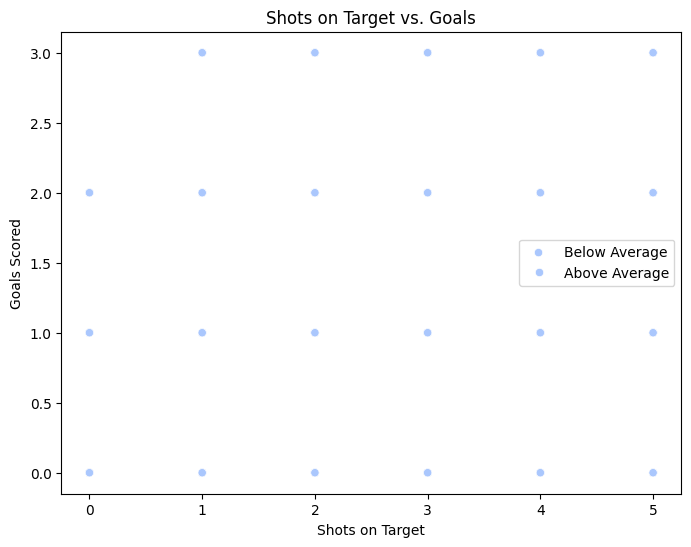

In [36]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Performance Label"], palette="coolwarm")
plt.title("Distribution of Player Performance")
plt.xlabel("Performance Label")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Below Average", "Above Average"])
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Shots on Target"], y=df["Goals"], hue=df["Performance Label"], palette="coolwarm")
plt.xlabel("Shots on Target")
plt.ylabel("Goals Scored")
plt.title("Shots on Target vs. Goals")
plt.legend(["Below Average", "Above Average"])
plt.show()